# Von 32 auf 71 Jahre: Medizin, Gesellschaft und die Revolution der Lebenserwartung

Gruppe: Marija Trifunovic, Sophie von Felten und Lorna Skrnjug

Fragen:
- Wie haben sich die Unterschiede in der Lebenserwartung zwischen Ländern und Geschlechtern entwickelt - und warum?
- Inwiefern ist die Verringerung der Kindersterblichkeit der entscheidende Treiber für die Verdopplung der Lebenserwartung?







---




Datenquelle:

https://ourworldindata.org/life-expectancy?insight=women-tend-to-live-longer-than-men-but-this-gap-has-changed-over-time#key-insights




# Einleitung

Die Lebenserwartung hat sich in den letzten zwei Jahrhunderten weltweit mehr als verdoppelt. Während sie um 1900 noch bei etwa 32 Jahren lag, beträgt sie heute über 70 Jahre. Diese Entwicklung ist nicht gleichmäßig verlaufen: Unterschiede zwischen Ländern und Geschlechtern prägen das Bild. Frauen leben im Durchschnitt länger als Männer, doch die Größe dieser Differenz variiert über Zeit und Raum. Ein zentraler Treiber der steigenden Lebenserwartung ist der Rückgang der Kindersterblichkeit, der jedoch nicht allein verantwortlich ist. Ziel dieser Arbeit ist es, die Entwicklung der Unterschiede zwischen Ländern und Geschlechtern zu erklären und die Rolle der Kindersterblichkeit für die Verdopplung der Lebenserwartung zu analysieren.

In [144]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [145]:
# Lebenserwartung gesamt
url = "https://ourworldindata.org/grapher/life-expectancy.csv"

# Daten laden
df_1 = pd.read_csv(url)

df_1 = df_1.rename(columns= {"Period life expectancy at birth": "Life expectancy"})

# Erste Zeilen anzeigen
print(df_1.head())
print(df_1.columns)

        Entity Code  Year  Life expectancy
0  Afghanistan  AFG  1950          28.1563
1  Afghanistan  AFG  1951          28.5836
2  Afghanistan  AFG  1952          29.0138
3  Afghanistan  AFG  1953          29.4521
4  Afghanistan  AFG  1954          29.6975
Index(['Entity', 'Code', 'Year', 'Life expectancy'], dtype='object')


In [146]:
# Lebenserwartung gesamt
url = "life-expectation-at-birth-by-sex.csv"

# Daten laden
df_2 = pd.read_csv(url)

# Rename
df_2 = df_2.rename(columns= {"Period life expectancy - Sex: male - Age: 0": "male", "Period life expectancy - Sex: female - Age: 0": "female"})

# Erste Zeilen anzeigen
print(df_2.head())
print(df_2.columns)

        Entity Code  Year   female     male
0  Afghanistan  AFG  1950  28.8345  27.5467
1  Afghanistan  AFG  1951  29.2748  27.9711
2  Afghanistan  AFG  1952  29.7139  28.3940
3  Afghanistan  AFG  1953  30.1643  28.8222
4  Afghanistan  AFG  1954  30.3958  29.0786
Index(['Entity', 'Code', 'Year', 'female', 'male'], dtype='object')


In [147]:
# merge
df_1.set_index(['Entity', 'Year', "Code"],inplace=True)
df_2.set_index(['Entity', 'Year', "Code"],inplace=True)
df  = pd.concat([df_1, df_2], axis=1, join='inner', ignore_index=False).reset_index()
df

,Entity,Year,Code,Life expectancy,female,male
0,Afghanistan,1950,AFG,28.1563,28.8345,27.5467
1,Afghanistan,1951,AFG,28.5836,29.2748,27.9711
2,Afghanistan,1952,AFG,29.0138,29.7139,28.3940
3,Afghanistan,1953,AFG,29.4521,30.1643,28.8222
4,Afghanistan,1954,AFG,29.6975,30.3958,29.0786
...,...,...,...,...,...,...
20799,Zimbabwe,2019,ZWE,61.0603,63.0488,58.8296
20800,Zimbabwe,2020,ZWE,61.5300,63.7468,59.0906
20801,Zimbabwe,2021,ZWE,60.1347,62.2889,57.7174
20802,Zimbabwe,2022,ZWE,62.3601,64.5438,59.8805


In [148]:
df.loc[50:,] # kontrollieren

,Entity,Year,Code,Life expectancy,female,male
50,Afghanistan,2000,AFG,55.0047,56.5547,53.4627
51,Afghanistan,2001,AFG,55.5113,57.0889,53.9408
52,Afghanistan,2002,AFG,56.2251,57.4417,54.9858
53,Afghanistan,2003,AFG,57.1713,58.4724,55.8489
54,Afghanistan,2004,AFG,57.8098,59.0728,56.5190
...,...,...,...,...,...,...
20799,Zimbabwe,2019,ZWE,61.0603,63.0488,58.8296
20800,Zimbabwe,2020,ZWE,61.5300,63.7468,59.0906
20801,Zimbabwe,2021,ZWE,60.1347,62.2889,57.7174
20802,Zimbabwe,2022,ZWE,62.3601,64.5438,59.8805


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

## Format des Datensatzes:
Typisch Long-Format: Spalten wie country, year, sex, life expectancy.

Jede Zeile = eine Beobachtung für ein Land, Jahr und Geschlecht.

Kolumnenstruktur:
-country → String (Name des Landes)
-year → Integer (Jahreszahl)
-sex → String (male/female)
-life_expectancy → Float (Jahre)

## Pivot/Wide-Format 

Long-Format: Für Zeitreihenanalysen, Vergleiche über Länder und Geschlechter.

Wide-Format (Pivot): (Life expectancy_male, Life expectancy_female) 

Datentypen im Datensatz:
-string (Länder, Geschlecht)
-int (Jahr)
-float (Lebenserwartung)

Zusammenfassend: 
Der verwendete Datensatz liegt im Long Format vor und besteht aus Beobachtungen zur Lebenserwartung bei Geburt für verschiedene Länder über mehrere Jahre. Die Daten umfassen kategoriale Variablen (Land, Ländercode), eine diskrete Zeitvariable (Jahr) sowie eine kontinuierliche Messvariable (Lebenserwartung). Für Zeitreihen- und Trendanalysen wird das Long Format verwendet, während für Gruppenvergleiche und die Berechnung von Differenzen eine Pivotierung in ein Wide Format sinnvoll ist.


In [149]:
df[df['Year'] >= 2000]

,Entity,Year,Code,Life expectancy,female,male
50,Afghanistan,2000,AFG,55.0047,56.5547,53.4627
51,Afghanistan,2001,AFG,55.5113,57.0889,53.9408
52,Afghanistan,2002,AFG,56.2251,57.4417,54.9858
53,Afghanistan,2003,AFG,57.1713,58.4724,55.8489
54,Afghanistan,2004,AFG,57.8098,59.0728,56.5190
...,...,...,...,...,...,...
20799,Zimbabwe,2019,ZWE,61.0603,63.0488,58.8296
20800,Zimbabwe,2020,ZWE,61.5300,63.7468,59.0906
20801,Zimbabwe,2021,ZWE,60.1347,62.2889,57.7174
20802,Zimbabwe,2022,ZWE,62.3601,64.5438,59.8805


In [150]:
# Spaltennamen
print("Spalten:", df.columns.tolist())

# Datentypen
print(df.dtypes)

# Anzahl Länder und Jahre
print("Anzahl Länder:", df["Entity"].nunique())
print("Zeitraum:", df["Year"].min(), "-", df["Year"].max())

Spalten: ['Entity', 'Year', 'Code', 'Life expectancy', 'female', 'male']
Entity              object
Year                 int64
Code                object
Life expectancy    float64
female             float64
male               float64
dtype: object
Anzahl Länder: 264
Zeitraum: 1751 - 2023


In [151]:
# Übersicht der Datentypen
print(df_2.dtypes)

# Interpretation:
# - Entity: object (string, kategorial)
# - Code: object (string, ISO-Code)
# - Year: int64 (diskret, aber geordnet)
# - Life expectancy: float64 (kontinuierlich)

female    float64
male      float64
dtype: object


In [152]:
print("\n------ HEAD ------")
print(df.head())

print("\n------ DATENTYPEN ------")
print(df.dtypes)


------ HEAD ------
        Entity  Year Code  Life expectancy   female     male
0  Afghanistan  1950  AFG          28.1563  28.8345  27.5467
1  Afghanistan  1951  AFG          28.5836  29.2748  27.9711
2  Afghanistan  1952  AFG          29.0138  29.7139  28.3940
3  Afghanistan  1953  AFG          29.4521  30.1643  28.8222
4  Afghanistan  1954  AFG          29.6975  30.3958  29.0786

------ DATENTYPEN ------
Entity              object
Year                 int64
Code                object
Life expectancy    float64
female             float64
male               float64
dtype: object


In [153]:
# 4. GESCHLECHTERUNTERSCHIED ANALYSIEREN

# Reset index to make Entity, Year, Code regular columns
df_reset = df.reset_index() if df.index.name else df.copy()

# Calculate sex gap
df_reset["sex_gap"] = df_reset["female"] - df_reset["male"]

print("\n------ GRÖSSTE GESCHLECHTERUNTERSCHIEDE ------")
print(df_reset.sort_values("sex_gap", ascending=False).head())

print("\n------ DURCHSCHNITTLICHER UNTERSCHIED ------")
print(f"Durchschnittlicher Gap: {df_reset['sex_gap'].mean():.2f} Jahre")



------ GRÖSSTE GESCHLECHTERUNTERSCHIEDE ------
                      Entity  Year Code  Life expectancy   female     male  \
4262                  Cyprus  1974  CYP          54.5513  70.7944  44.1738   
6187                  France  1915  FRA          36.5500  52.7300  27.2800   
6186                  France  1914  FRA          38.2300  53.2900  29.3700   
6005                 Finland  1941  FIN          46.4200  60.6600  37.0400   
2325  Bosnia and Herzegovina  1993  BIH          50.8941  64.5224  41.8783   

      sex_gap  
4262  26.6206  
6187  25.4500  
6186  23.9200  
6005  23.6200  
2325  22.6441  

------ DURCHSCHNITTLICHER UNTERSCHIED ------
Durchschnittlicher Gap: 4.89 Jahre


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

1.	Die Variable Lebenserwartung bei Geburt ist eine kontinuierliche Variable, da sie gemessene Werte mit Dezimalstellen annehmen kann.
2.	Insgesamt stehen für die untersuchte Variable 19 560 Datenpunkte zur Verfügung.
3.	Die Verteilung der Lebenserwartung zeigt eine Konzentration der Werte zwischen 60 und 80 Jahren. Die Verteilung ist leicht linksschief, da einige Länder deutlich niedrigere Lebenserwartungen aufweisen. Einzelne Ausreisser sind insbesondere im unteren Wertebereich erkennbar.

Zusammenfassend: 
Die Rohdatenanalyse ist ein vorbereitender Schritt und bildet die methodische Grundlage für die anschliessende Beantwortung unserer Fragestellungen. Die untersuchte Variable Lebenserwartung bei Geburt ist kontinuierlich. Es stehen insgesamt 19 560 gültige Datenpunkte zur Verfügung, ohne fehlende Werte. Die Verteilung zeigt eine Häufung der Werte im Bereich von 60 bis 80 Jahren und weist eine leichte Linksschiefe auf. Zur Darstellung der Verteilung wurden ein Histogramm und ein Boxplot verwendet.


In [154]:
url_le_total = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Life%20expectancy%20at%20birth%20(total)%20-%20Clio-Infra/Life%20expectancy%20at%20birth%20(total)%20-%20Clio-Infra.csv"

url_le_female = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Life%20expectancy%20at%20birth%20(female)%20-%20Clio-Infra/Life%20expectancy%20at%20birth%20(female)%20-%20Clio-Infra.csv"

url_le_male = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Life%20expectancy%20at%20birth%20(male)%20-%20Clio-Infra/Life%20expectancy%20at%20birth%20(male)%20-%20Clio-Infra.csv"

url_u5 = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Child%20mortality%20under%205%20-%20Clio-Infra/Child%20mortality%20under%205%20-%20Clio-Infra.csv"


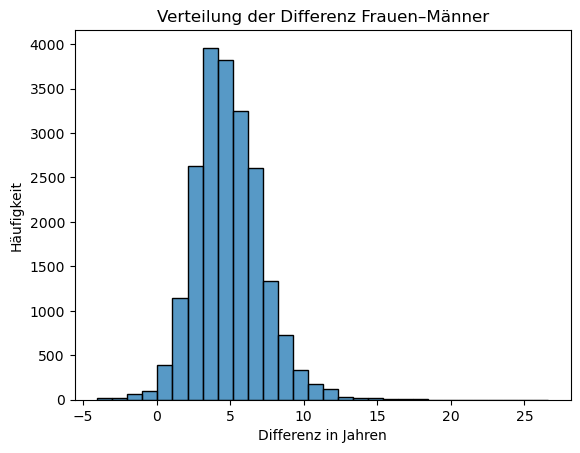

In [156]:
# Histogramm der Differenzen
sns.histplot(df_reset['sex_gap'], bins=30)
plt.title("Verteilung der Differenz Frauen–Männer")
plt.xlabel("Differenz in Jahren")
plt.ylabel("Häufigkeit")
plt.show()


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



In [157]:
import seaborn as sns
from matplotlib import pyplot as plt

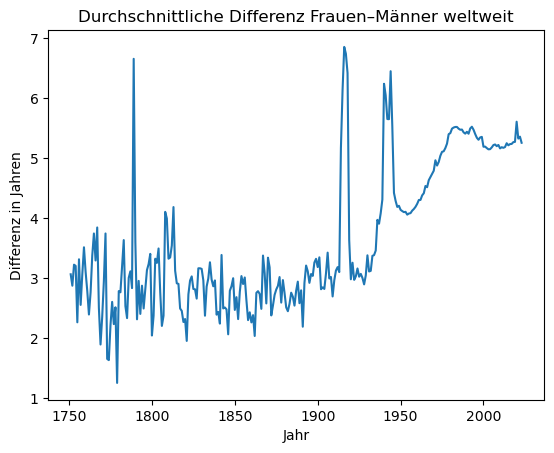

In [161]:
trend = df_reset.groupby("Year")["sex_gap"].mean()
trend.plot()
plt.title("Durchschnittliche Differenz Frauen–Männer weltweit")
plt.ylabel("Differenz in Jahren")
plt.xlabel("Jahr")
plt.show()